In [1]:
import copy
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pol_vals = np.linspace(0.005, 0.025, 11)
adh_vals = np.linspace(0.05, 0.25, 11)

#### Simulations w/o proliferation

In [3]:
pairwise_wass_matrix = np.load("adhesion_polarity_sweep_allpairs_fixed.npy")

In [4]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [5]:
# obtained by hierarchical clustering in R
permut_arr = [113, 81, 80, 57, 101, 103, 104, 115, 102, 91, 116, 92, 93, 56, 71, 112, 82, 69, 114, 94,
              106, 35, 83, 95, 34, 70, 12, 36, 58, 46, 68, 24, 23, 79, 90, 105, 117, 45, 47, 59, 48, 108,
              9, 18, 27, 11, 22, 29, 6, 5, 65, 10, 21, 32, 86, 38, 52, 33, 76, 19, 53, 84, 109, 64, 87, 3,
              4, 43, 15, 42, 8, 20, 31, 7, 75, 44, 66, 17, 77, 28, 51, 30, 55, 73, 54, 74, 50, 107, 26, 37,
              97, 1, 14, 2, 88, 16, 49, 63, 110, 41, 62, 121, 120, 39, 61, 98, 111, 89, 100, 67, 78, 40, 99,
              118, 25, 60, 13, 72, 119, 85, 96]
permut_arr_2 = [x-1 for x in permut_arr]

In [6]:
row_swapped = pairwise_wass_mat[permut_arr_2, :]
swapped = row_swapped[:, permut_arr_2]

In [7]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [8]:
cond_names_swp = [cond_names[x] for x in permut_arr_2]
cond_vals_swp = [cond_vals[x] for x in permut_arr_2]

In [9]:
# remove polarization |P| = 0.005, did not reach steady state
num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr = np.delete(permut_arr, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

In [10]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [11]:
cluster_1 = cond_names_swp[:38]
cluster_2 = cond_names_swp[38:77]
cluster_3 = cond_names_swp[79:100]
cluster_4 = cond_names_swp[100]
cluster_5 = cond_names_swp[101:]

In [12]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr)

k = 0
for i in range(11):
    for j in range(10):
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
        if idx <= 37:
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx <= 78:
            classified[i,j,:] = [77/255, 175/255, 74/255]     # individual (green) [0, 1, 0]
        elif idx <= 99:
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning w/ individuals (light red) [0.85, 0, 0]
        elif idx == 100:
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier [1, 1, 0]
        else:
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]

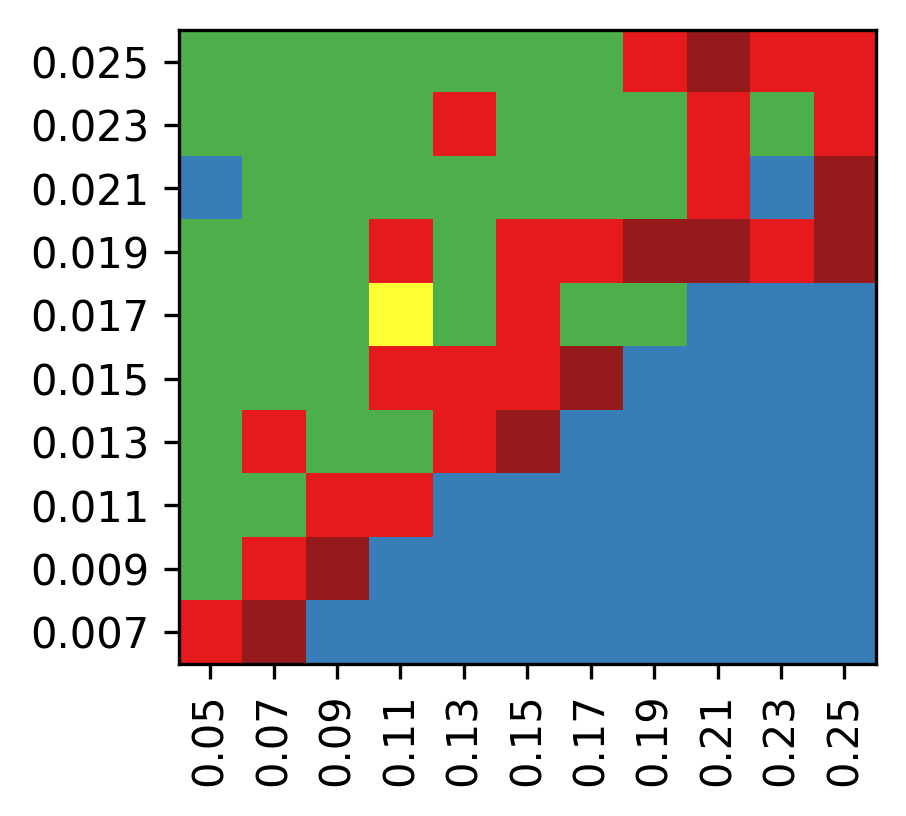

In [13]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))))

#### Simulations w/ proliferation

In [14]:
pairwise_wass_matrix_prolif = np.load("adhesion_polarity_sweep_allpairs.npy")
pairwise_wass_mat_prolif = copy.deepcopy(pairwise_wass_matrix_prolif)

In [15]:
# obtained by hierarchical clustering in R
permut_arr = [8, 6, 29, 9, 21, 28, 53, 11, 54, 4, 32, 20, 7, 33, 10, 19, 44, 43, 22, 16, 17, 42, 15, 27, 100,
              59, 94, 67, 82, 83, 107, 95, 72, 118, 49, 48, 106, 87, 88, 18, 64, 31, 40, 99, 5, 30, 39, 3, 51,
              50, 74, 55, 120, 62, 41, 77, 98, 75, 65, 108, 1, 12, 60, 26, 61, 119, 63, 84, 96, 37, 85, 121, 14,
              73, 109, 13, 25, 52, 66, 2, 86, 76, 110, 38, 97, 47, 71, 70, 23, 117, 56, 36, 45, 102, 115, 116, 57,
              113, 93, 104, 58, 81, 103, 78, 92, 80, 114, 24, 34, 35, 46, 105, 89, 111, 69, 90, 112, 68, 101, 79, 91]
permut_arr_2 = [x-1 for x in permut_arr]

In [16]:
row_swapped = pairwise_wass_mat_prolif[permut_arr_2, :]
swapped = row_swapped[:, permut_arr_2]

In [17]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [18]:
cond_names_swp = [cond_names[x] for x in permut_arr_2]
cond_vals_swp = [cond_vals[x] for x in permut_arr_2]

In [19]:
# remove polarization |P| = 0.005, did not reach steady state
num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr = np.delete(permut_arr, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

In [20]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [21]:
cluster_1 = cond_names_swp[:25]
cluster_2 = cond_names_swp[25:36]
cluster_3 = cond_names_swp[36:58]
cluster_4 = cond_names_swp[58]
cluster_5 = cond_names_swp[59:81]
cluster_6 = cond_names_swp[81:]

In [22]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr)
k = 0
for i in range(11):
    for j in range(10):
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
        if idx <= 24:
            classified[i,j,:] = [228/255, 26/255, 28/255]      # spanning (red) [1, 0, 0]
        elif idx <= 35:
            classified[i,j,:] = [150/255, 26/255, 28/255]      # spanning with clusters (dark red)
        elif idx <= 57:
            classified[i,j,:] = [228/255, 26/255, 28/255]      # spanning (red) [1, 0, 0]
        elif idx == 58:
            classified[i,j,:] = [150/255, 26/255, 28/255]      # spanning with clusters (dark red)
        elif idx <= 80:
            classified[i,j,:] = [228/255, 26/255, 28/255]      # spanning (red) [1, 0, 0]
        else:
            classified[i,j,:] = [55/255, 126/255, 184/255]     # clustered (blue) [0, 0, 1] 

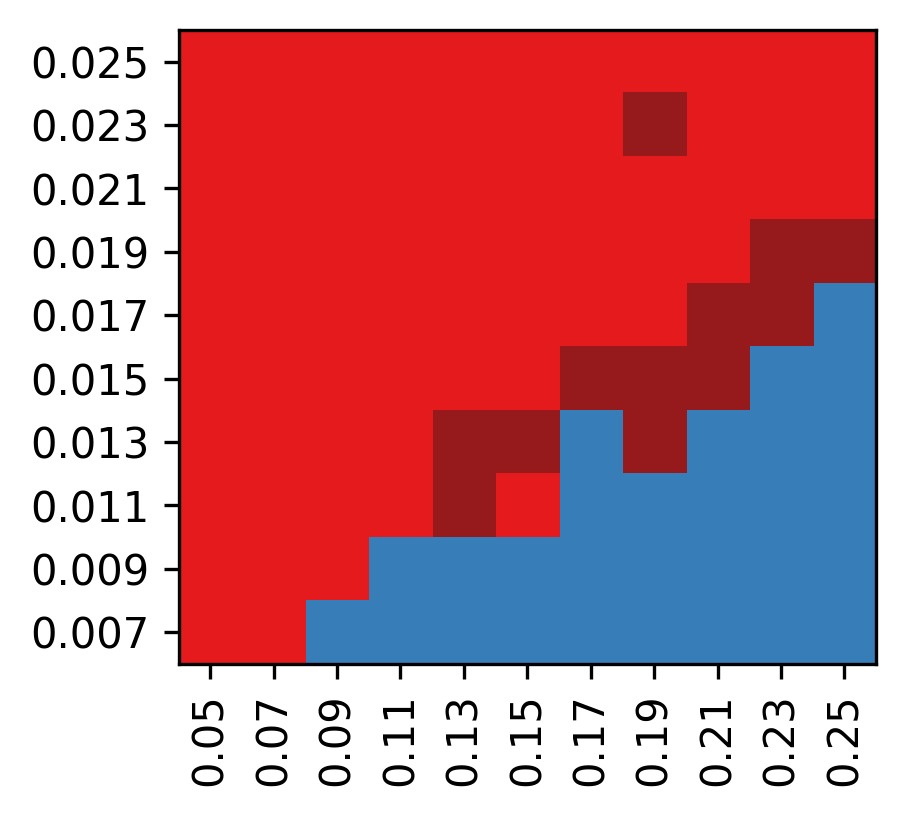

In [23]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))))